In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [6]:
path = '../../../Data/2025/08 - August/'
AMS_paths = ['250822_Sabinene_100ppb_0C/', '250825_Sabinene_100ppb_10C/', '250826_Sabinene_100ppb_neg10C/']

SMPS = import_SMPS(f'{path}250822_Sabinene_100ppb_0C/SMPS/Mass/', '', 0)
SMPS[SMPS.keys()[38]] = SMPS[SMPS.keys()[38]]*1.5

AMS = {}
for AMS_path in AMS_paths:
    df = import_txt(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    AMS[name] = df

print(AMS['250822'].keys())

Index(['t_series', 'HROrg_M_all', 'HRNO3_M_all', 'HRSO4_M_all', 'HRNH4_M_all',
       'HRChl_M_all', 'Ratio_H_C_all_IA', 'Ratio_O_C_all_IA',
       'familyCHN_M_all', 'familyCHO1_M_all', 'familyCHO1N_M_all',
       'familyCH_M_all', 'MSSM_all_HROrg43', 'MSSM_all_HROrg44', 'Time'],
      dtype='object')


[Text(0, 0.5, 'Concentration / $\\mu$g m$^{-3}$')]

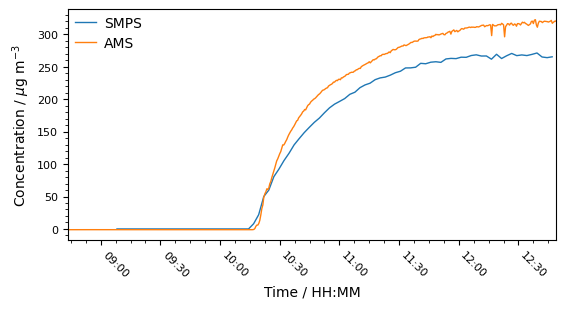

In [9]:
fig, ax = plt.subplots(figsize = (6.3, 3))

plot_total(ax, SMPS, SMPS.keys()[38], None, False)
plot_total(ax, AMS['250822'], 'HROrg_M_all', None, False)

ax.legend(labels = ['SMPS', 'AMS'])
ax.set(ylabel = 'Concentration / $\mu$g m$^{-3}$')

66 66
f(x) = 0.8536970279048957x + 1.140373856465219, R2 = 0.9990500115419988


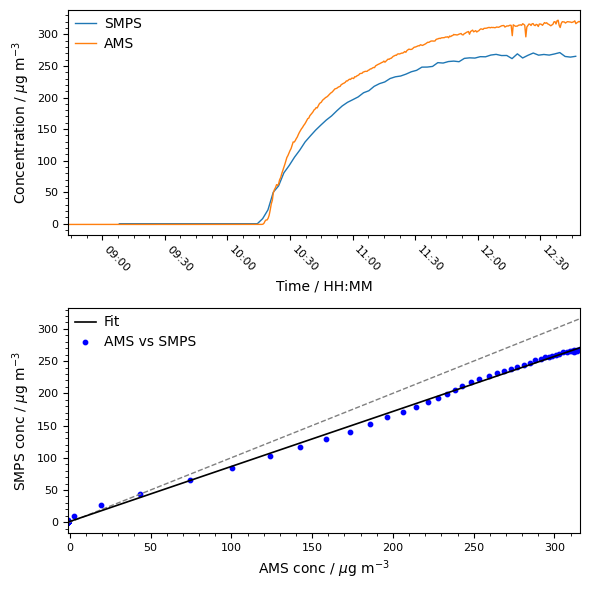

In [19]:
Running_AMS = running_mean(AMS['250822'], ['HROrg_M_all'], 'Time', '3T', 3, ['2025-08-22 09:15', '2025-08-22 12:30'])
Running_AMS['Time'] = Running_AMS.index
Running_AMS = Running_AMS.reset_index(drop = True)
Running_SMPS = running_mean(SMPS, [SMPS.keys()[38]], 'Time', '3T', 3, ['2025-08-22 09:15', '2025-08-22 12:33'])
Running_SMPS['Time'] = Running_SMPS.index
Running_SMPS = Running_SMPS.reset_index(drop = True)

print(len(Running_AMS['HROrg_M_all']), len(Running_SMPS[SMPS.keys()[38]]))

fig, axs = plt.subplots(2, 1, figsize = (6, 6))

plot_total(axs[0], SMPS, SMPS.keys()[38], None, False)
plot_total(axs[0], AMS['250822'], 'HROrg_M_all', None, False)

axs[0].legend(labels = ['SMPS', 'AMS'])
axs[0].set(ylabel = 'Concentration / $\mu$g m$^{-3}$')

instrument_comparison(axs[1], Running_AMS['HROrg_M_all'], Running_SMPS[SMPS.keys()[38]], 'AMS vs SMPS', ['AMS conc / $\mu$g m$^{-3}$', 'SMPS conc / $\mu$g m$^{-3}$'], False)

fig.tight_layout()
fig.savefig('AMSvsSMPS.jpg', dpi = 600)